In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys, glob, tqdm
import _pickle as pkl

## load the data

In [3]:
# path = '/Volumes/s1/test/NIDAQ_TEST_g0/'
path='/Users/danieljdenman/data/NIDAQ_TEST_g0/'

In [4]:
glob.glob(path+'*bin')

['/Users/danieljdenman/data/NIDAQ_TEST_g0/NIDAQ_TEST_g0_t0.nidq.bin']

In [5]:
mm = np.memmap(glob.glob(path+'*bin')[0],dtype=np.uint16)

get just the digital lines

In [6]:
digital_words = mm[8::9] # there are 9 NI channels; the last is the digital words. start at the 9th entry (the digital words) and get every 9th

In [7]:
print(digital_words.shape[0]/1000000)

7222.034199


## parse into binary lines
from https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
<br>examples (1 means a line is high, 0 means it is low):

In [8]:
'{0:08b}'.format(digital_words[:600040][0])

'10011111'

In [9]:
'{0:08b}'.format(digital_words[:64][1])

'10011111'

go through each timepoint and figure out if each line has switched states (high --> low or low --> high). the output will be two dictionaries ```digital_lines_rising``` and ```digital_lines_falling```, which have each _sample_ where the transition happened

In [10]:
num_digital_channels=8 # TODO: update to get this from .meta file; from niXDChans
digital_lines_rising = {}
digital_lines_falling = {}
for i in tqdm.tqdm(range(digital_words.shape[0])[::10]): #note that this downsamples by factor 10, to 100kHz
    if i==0:
        state_previous_sample = '{0:08b}'.format(digital_words[i])
        for line in range(num_digital_channels):
            digital_lines_rising['D'+str(line)] = [] #initialize empty list
            digital_lines_falling['D'+str(line)] = [] #initialize empty list
    else:
        state_this_sample = '{0:08b}'.format(digital_words[i])
        changes = [j for j in range(len(state_previous_sample)) if state_previous_sample[j] != state_this_sample[j]]
        for line in changes:   
                if state_this_sample[line] == '1':
                    digital_lines_rising['D'+str(line)].extend([i*10]) #note that this scales back up to 1MHz sampling rate 
                else:
                    digital_lines_falling['D'+str(line)].extend([i*10])  #note that this scales back up to 1MHz sampling rate 
        state_previous_sample=state_this_sample #update sample

100%|██████████| 722203420/722203420 [50:43<00:00, 237283.56it/s]  


NameError: name 'pkl' is not defined

In [13]:
pkl.dump(digital_lines_rising,open(os.path.join(path,'digital_lines_rising_samples.pkl'),'wb'))
pkl.dump(digital_lines_falling,open(os.path.join(path,'digital_lines_falling_samples.pkl'),'wb'))

reorder manually this time because i had it backwards

In [28]:
digital_lines_rising2 = {}
digital_lines_falling2 = {}
for i,key in enumerate(digital_lines_rising.keys()):
    digital_lines_rising2['D'+str(7-i)]=digital_lines_rising[key]
    digital_lines_falling2['D'+str(7-i)]=digital_lines_falling[key]
    

In [31]:
pkl.dump(digital_lines_rising2,open(os.path.join(path,'digital_lines_rising_samples.pkl'),'wb'))
pkl.dump(digital_lines_falling2,open(os.path.join(path,'digital_lines_falling_samples.pkl'),'wb'))

## check the outputs

In [ ]:
#digital_lines_rising = pkl.load(open(os.path.join(path,'digital_lines_rising_samples.pkl'),'wb'))

In [33]:
digital_lines_rising2.keys()

dict_keys(['D7', 'D6', 'D5', 'D4', 'D3', 'D2', 'D1', 'D0'])

In [37]:
np.array(digital_lines_rising2['D2']).shape

(294001,)

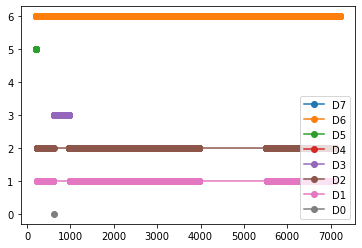

In [73]:
for i,line in enumerate(digital_lines_rising2.keys()):
    plt.plot(np.array(digital_lines_rising2[line])/1e7,np.ones(len(digital_lines_rising2[line]))*(7-i),'-o',label=line)
plt.legend(loc='lower right')


In [75]:
np.array(digital_lines_rising2[line]).shape

(7201,)

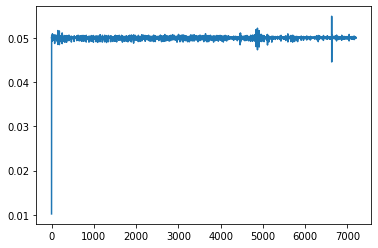

In [74]:
line='D3'
plt.plot(np.diff(np.array(digital_lines_rising2[line])/1e7))

In [58]:
np.array(digital_lines_rising2[line])/1e7

array([ 238.66561,  238.71737,  238.76665, ..., 7102.83229, 7102.93181,
       7103.03237])

In [59]:
np.array(digital_lines_falling2[line])/1e7

array([ 237.17943,  238.71592,  238.76527, ..., 7102.93179, 7103.0323 ,
       7103.13232])

In [ ]:
num_digital_channels=15
digital_lines_rising = {}
digital_lines_falling = {}
for i in tqdm.tqdm(range(digital_words.shape[0])[::100]):
    if i==0:
        state_previous_sample = '{0:08b}'.format(digital_words[i])
        for line in range(num_digital_channels):
            digital_lines_rising['D'+str(line)] = [] #initialize empty list
            digital_lines_falling['D'+str(line)] = [] #initialize empty list
    else:
        state_this_sample = '{0:08b}'.format(digital_words[i])
        changes = [j for j in range(len(state_previous_sample)) if state_previous_sample[j] != state_this_sample[j]]
        for line in changes:   
                if state_this_sample[line] == '1':
                    digital_lines_rising['D'+str(line)].extend([i*100])
                else:
                    digital_lines_falling['D'+str(line)].extend([i*100])
        state_previous_sample=state_this_sample #update sample

  1%|▏         | 1003139/72220342 [23:58<36:17:59, 544.98it/s]

In [17]:
digital_lines_rising

{'D0': [],
 'D1': [],
 'D2': [],
 'D3': [],
 'D4': [],
 'D5': [],
 'D6': [],
 'D7': [],
 'D8': [4190000,
  11590000,
  30870000,
  41300000,
  44340000,
  52390000,
  59480000,
  65770000,
  70690000,
  83290000,
  84090000,
  89970000,
  93860000,
  100340000,
  118260000,
  122700000,
  132060000,
  154900000,
  159890000,
  161610000,
  162050000,
  175760000,
  183180000,
  187360000,
  207470000,
  223650000,
  225030000,
  239930000,
  244270000,
  252910000,
  259170000,
  262620000,
  264470000,
  264780000,
  276500000,
  281280000,
  305410000,
  325620000,
  328240000,
  352290000,
  356220000,
  382860000,
  408970000,
  416600000,
  419900000,
  449750000,
  459530000,
  465040000,
  486420000,
  495640000,
  513220000,
  515870000,
  524400000,
  530060000,
  540820000,
  543220000,
  559980000,
  564970000,
  578160000,
  578770000,
  583600000,
  585790000,
  604980000,
  605190000,
  610430000,
  611440000,
  622550000,
  627360000,
  638440000,
  671730000,
  67408000

In [35]:
range(np.where(np.array(list(state_this_sample)) != np.array(list(state_previous_sample)))[0])

TypeError: only integer scalar arrays can be converted to a scalar index

In [16]:
# %%timeit
num_digital_channels=15
digital_lines_rising = {}
digital_lines_falling = {}
for line in range(num_digital_channels):
    digital_lines_rising['D'+str(line)] = [] #initialize empty list
    digital_lines_falling['D'+str(line)] = [] #initialize empty list

In [40]:
%%timeit

state_previous_sample = '{0:08b}'.format(32560)

state_this_sample = '{0:08b}'.format(32548)
changes = [i for i in range(len(state_previous_sample)) if state_previous_sample[i] != state_this_sample[i]]
for line in changes:
#     pass
#     if state_this_sample[line] != state_previous_sample[line]:
#         if state_this_sample[line] == 1:
#             digital_lines_rising['D'+str(line)].extend([0])
#         else:
#             digital_lines_falling['D'+str(line)].extend([0])
state_previous_sample=state_this_sample #update sample

2.05 µs ± 56.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [27]:
state_previous_sample

'111111100100100'

In [28]:
import difflib

In [34]:
for i,s in enumerate(difflib.ndiff(state_previous_sample, state_this_sample)):
    print(s)

  1
  1
  1
  1
  1
  1
  1
  0
  0
  1
  0
  0
  1
  0
  0


In [37]:
list(set([c for c in state_previous_sample if c in state_this_sample]))  

['1', '0']

In [39]:
[i for i in range(len(state_previous_sample)) if state_previous_sample[i] != state_this_sample[i]]

[]

In [31]:
np.where(np.array(list('{0:08b}'.format(digital_words[:64][0]))) != np.array(list('{0:08b}'.format(digital_words[:64][12]))))[0]

array([10, 11])

array(['1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '0'], dtype='<U1')

In [25]:
np.where('{0:08b}'.format(digital_words[:64][0]) == '{0:08b}'.format(digital_words[:64][12]))

(array([], dtype=int64),)